In [1]:
import tensorflow as tf

import pathlib
from typing import Any,Union

import matplotlib.pyplot as plt

2022-09-20 19:37:45.821461: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 19:37:45.987075: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-20 19:37:45.987095: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-20 19:37:46.017075: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-20 19:37:46.839981: W tensorflow/stream_executor/platform/de

In [2]:
def get_dataset_dir(path) -> str:
    return pathlib.Path(path)

In [3]:
BATCH_SIZE:int  = 64
IMG_HEIGHT:int  = 180
IMG_WIDTH:int   = 180
VAL_SPLIT:float = 0.2

In [4]:
def load_dataset(dir) -> Union[list | Any, list | Any]:
  train_ds = tf.keras.utils.image_dataset_from_directory(
    dir,
    validation_split=VAL_SPLIT,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)
  val_ds = tf.keras.utils.image_dataset_from_directory(
    dir,
    validation_split=VAL_SPLIT,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)
  return train_ds, val_ds

# Import dataset

In [5]:
data_dir:str = get_dataset_dir('dataset')
print("Nombres d'image: {}".format(len(list(data_dir.glob('*/*.jpg')))))

Nombres d'image: 921


In [6]:
train_ds, val_ds = load_dataset(data_dir)
class_names = train_ds.class_names
print(class_names)

Found 999 files belonging to 5 classes.
Using 800 files for training.
Found 999 files belonging to 5 classes.
Using 199 files for validation.
['painting', 'photo', 'schematics', 'sketch', 'text']


2022-09-20 19:37:48.295563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-20 19:37:48.295612: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-20 19:37:48.295655: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Kali): /proc/driver/nvidia/version does not exist
2022-09-20 19:37:48.296223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
MODEL_NAME = 'model'
model:tf.keras.Model = tf.keras.models.load_model(MODEL_NAME)

In [11]:
EPOCHES=2

history:tf.keras.callbacks.History = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHES
)

Epoch 1/2
13/13 [==============================] - 16s 1s/step - loss: 2.0165 - accuracy: 0.7025 - val_loss: 0.8822 - val_accuracy: 0.7186
Epoch 2/2
13/13 [==============================] - 15s 1s/step - loss: 0.3646 - accuracy: 0.8838 - val_loss: 0.9363 - val_accuracy: 0.6985


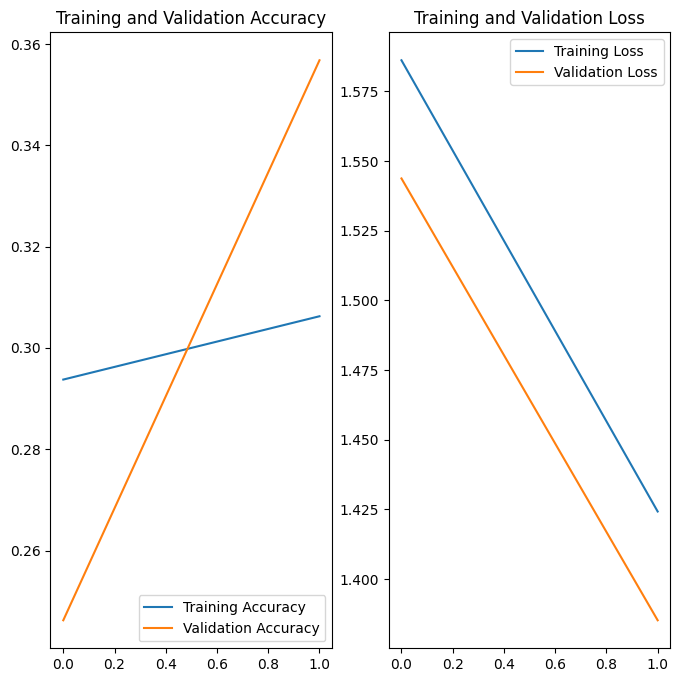

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save

In [ ]:
import datetime

date:datetime = datetime.datetime.now().strftime("%m.%d.%Y_%H:%M:%S")
model_dir:str = f"model_{date}"
model.save(model_dir)
f = open(f"{model_dir}/model_summary.txt", "a")
model.summary(print_fn=lambda x: f.write(x + '\n'))
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
f.close()